In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
iris_df = pd.read_csv("iris.csv")

In [3]:
iris_df.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [4]:
iris_df.describe()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000

In [5]:
iris_df.shape

(150, 6)

In [6]:
X_variables = iris_df.iloc[:, 1:5]
y_variables = iris_df.iloc[:, 5]

In [7]:
X_variables

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]

In [8]:
y_variables

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [9]:
sc = StandardScaler()
transformed_df = sc.fit_transform(X_variables)

In [10]:
print(transformed_df[:10]) # 10 samples
print(transformed_df[:10].shape)

[[-0.90068117  1.03205722 -1.3412724  -1.31297673]
 [-1.14301691 -0.1249576  -1.3412724  -1.31297673]
 [-1.38535265  0.33784833 -1.39813811 -1.31297673]
 [-1.50652052  0.10644536 -1.2844067  -1.31297673]
 [-1.02184904  1.26346019 -1.3412724  -1.31297673]
 [-0.53717756  1.95766909 -1.17067529 -1.05003079]
 [-1.50652052  0.80065426 -1.3412724  -1.18150376]
 [-1.02184904  0.80065426 -1.2844067  -1.31297673]
 [-1.74885626 -0.35636057 -1.3412724  -1.31297673]
 [-1.14301691  0.10644536 -1.2844067  -1.4444497 ]]
(10, 4)


In [11]:
print(transformed_df.T[:1])
print(transformed_df.T[:10].shape)

[[-0.90068117 -1.14301691 -1.38535265 -1.50652052 -1.02184904 -0.53717756
  -1.50652052 -1.02184904 -1.74885626 -1.14301691 -0.53717756 -1.26418478
  -1.26418478 -1.87002413 -0.05250608 -0.17367395 -0.53717756 -0.90068117
  -0.17367395 -0.90068117 -0.53717756 -0.90068117 -1.50652052 -0.90068117
  -1.26418478 -1.02184904 -1.02184904 -0.7795133  -0.7795133  -1.38535265
  -1.26418478 -0.53717756 -0.7795133  -0.41600969 -1.14301691 -1.02184904
  -0.41600969 -1.14301691 -1.74885626 -0.90068117 -1.02184904 -1.62768839
  -1.74885626 -1.02184904 -0.90068117 -1.26418478 -0.90068117 -1.50652052
  -0.65834543 -1.02184904  1.40150837  0.67450115  1.2803405  -0.41600969
   0.79566902 -0.17367395  0.55333328 -1.14301691  0.91683689 -0.7795133
  -1.02184904  0.06866179  0.18982966  0.31099753 -0.29484182  1.03800476
  -0.29484182 -0.05250608  0.4321654  -0.29484182  0.06866179  0.31099753
   0.55333328  0.31099753  0.67450115  0.91683689  1.15917263  1.03800476
   0.18982966 -0.17367395 -0.41600969 -

In [12]:
covariance_matrix = np.cov(transformed_df.T)
covariance_matrix

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

In [13]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [14]:
eigen_values

array([2.93035378, 0.92740362, 0.14834223, 0.02074601])

In [15]:
eigen_vectors

array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
       [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
       [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]])

In [16]:
eigen_pairs = [(np.abs(eigen_values[i]), eigen_vectors[:, i]) for i in range(len(eigen_values))]

print('Eigenvalues arranged in descending order + its Eigenvectors:')

for i in eigen_pairs:
    print(i[0], i[1])

Eigenvalues arranged in descending order + its Eigenvectors:
2.930353775589317 [ 0.52237162 -0.26335492  0.58125401  0.56561105]
0.9274036215173418 [-0.37231836 -0.92555649 -0.02109478 -0.06541577]
0.14834222648163986 [-0.72101681  0.24203288  0.14089226  0.6338014 ]
0.020746013995595867 [ 0.26199559 -0.12413481 -0.80115427  0.52354627]


In [17]:
pca = PCA()

In [18]:
pca = pca.fit(transformed_df)

In [19]:
explained_variance = pca.explained_variance_ratio_

In [20]:
explained_variance

array([0.72770452, 0.23030523, 0.03683832, 0.00515193])

We can observe that the first component captures 72.77%
variation, the second captures 23.03% variation, and so on.

<Axes: xlabel='Principal Component', ylabel='variance'>

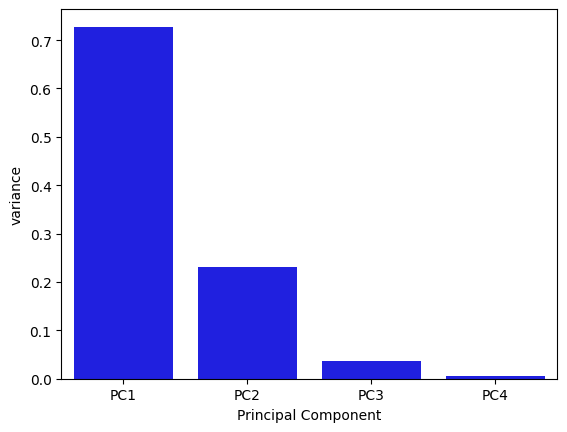

In [21]:
dataframe = pd.DataFrame({
    "variance": pca.explained_variance_ratio_,
    "Principal Component": ["PC1", "PC2", "PC3", "PC4"]
})

sns.barplot(
    x="Principal Component",
    y="variance",
    data=dataframe,
    color="b"
)

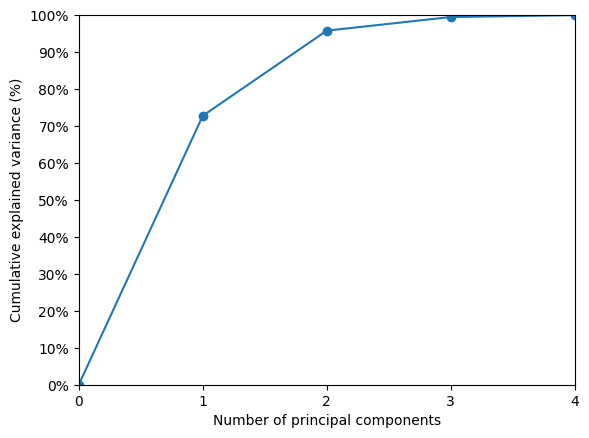

In [22]:
from matplotlib.ticker import PercentFormatter

cum_var = np.cumsum(pca.explained_variance_ratio_)

x = np.arange(0, len(cum_var) + 1)
y = np.insert(cum_var, 0, 0)

plt.plot(x, y, marker="o")
plt.xticks(x)
plt.xlim(0, len(cum_var))

plt.ylim(0, 1)                      # 0% to 100% exactly
plt.yticks(np.linspace(0, 1, 11))   # 0%, 10%, ..., 100%

ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(1.0, decimals=0))

plt.xlabel("Number of principal components")
plt.ylabel("Cumulative explained variance (%)")
plt.show()

### Cumulative explained variance (PCA)

This plot shows how much of the dataset’s total variance is captured as we keep more principal components (PCs) after PCA on standardized features.

- **x-axis:** number of PCs kept (0–4)
- **y-axis:** cumulative explained variance (**%**)

Interpretation:
- **1 PC** captures ~**72.8%** of the variance.
- **2 PCs** capture ~**95.8%** (PC1 + PC2).
- After **2 PCs**, the curve flattens (adding PC3/PC4 gives only small gains).

**Why pick 2 PCs?**  
It keeps almost all the information (~96%) while reducing 4 features down to 2 dimensions (simpler and easy to visualize).

In [23]:
pca_2 = PCA(n_components=2)
pca_2 = pca_2.fit(transformed_df)
pca_2d = pca_2.transform(transformed_df)

# 1 liner
# pca_2.fit_transform(transformed_df)

In [24]:
pca_2

PCA(n_components=2)

In [25]:
print(pca_2d[:10])
print(pca_2d.shape)

[[-2.26454173  0.5057039 ]
 [-2.0864255  -0.65540473]
 [-2.36795045 -0.31847731]
 [-2.30419716 -0.57536771]
 [-2.38877749  0.6747674 ]
 [-2.07053681  1.51854856]
 [-2.44571134  0.07456268]
 [-2.23384186  0.24761393]
 [-2.34195768 -1.09514636]
 [-2.18867576 -0.44862905]]
(150, 2)


In [26]:
iris_df["Species"] = iris_df["Species"].replace({
    'Iris-setosa': 0, 
    'Iris-versicolor': 1, 
    'Iris-virginica': 2
    })

/var/folders/wv/2h0s113s3fd7yw2x8rkjxhxh0000gn/T/ipykernel_43220/841203992.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  iris_df["Species"] = iris_df["Species"].replace({


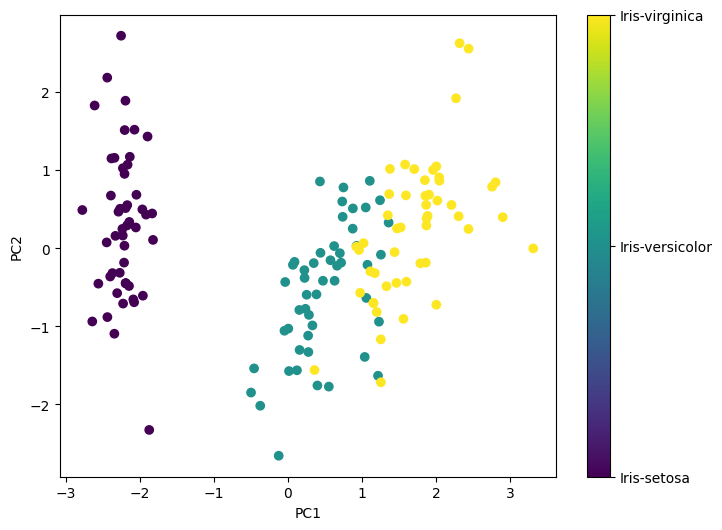

In [27]:
label_map = {0: "Iris-setosa", 1: "Iris-versicolor", 2: "Iris-virginica"}

plt.figure(figsize=(8, 6))
sc = plt.scatter(
    pca_2d[:, 0],
    pca_2d[:, 1],
    c=iris_df["Species"],
    cmap="viridis"
)

cbar = plt.colorbar(sc, ticks=[0, 1, 2])
cbar.ax.set_yticklabels([label_map[i] for i in [0, 1, 2]])

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [28]:
pca_4 = PCA(n_components=4)
pca_4 = pca_4.fit(transformed_df)
pca_4d = pca_4.transform(transformed_df)

In [29]:
pca_4

PCA(n_components=4)

In [30]:
print(pca_4d[:10])
print(pca_4d.shape)

[[-2.26454173  0.5057039   0.12194335 -0.02307332]
 [-2.0864255  -0.65540473  0.22725083 -0.10320824]
 [-2.36795045 -0.31847731 -0.05147962 -0.02782523]
 [-2.30419716 -0.57536771 -0.09886044  0.06631146]
 [-2.38877749  0.6747674  -0.02142785  0.03739729]
 [-2.07053681  1.51854856 -0.03068426 -0.00439877]
 [-2.44571134  0.07456268 -0.34219764  0.03809657]
 [-2.23384186  0.24761393  0.08257446  0.02550516]
 [-2.34195768 -1.09514636 -0.1535624   0.02679383]
 [-2.18867576 -0.44862905  0.24655952  0.0399073 ]]
(150, 4)


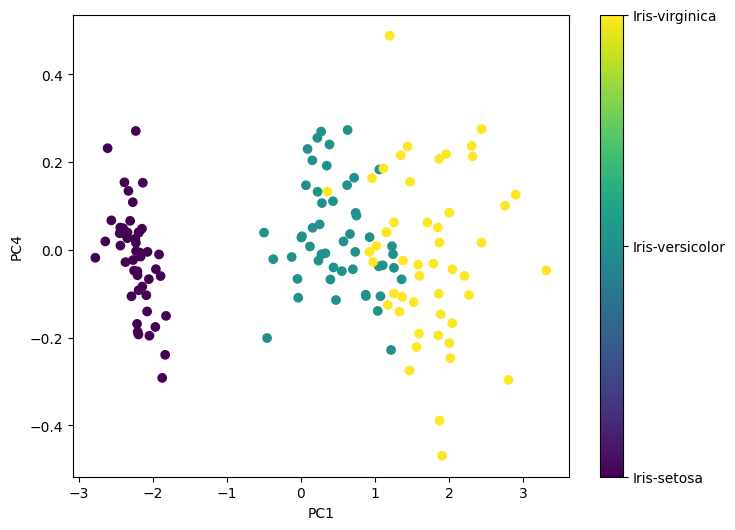

In [31]:
plt.figure(figsize=(8, 6))
sc = plt.scatter(
    pca_4d[:, 0],   # PC1
    pca_4d[:, 3],   # PC4
    c=iris_df["Species"],
    cmap="viridis"
)

cbar = plt.colorbar(sc, ticks=[0, 1, 2])
cbar.ax.set_yticklabels([label_map[i] for i in [0, 1, 2]])

plt.xlabel("PC1")
plt.ylabel("PC4")
plt.show()

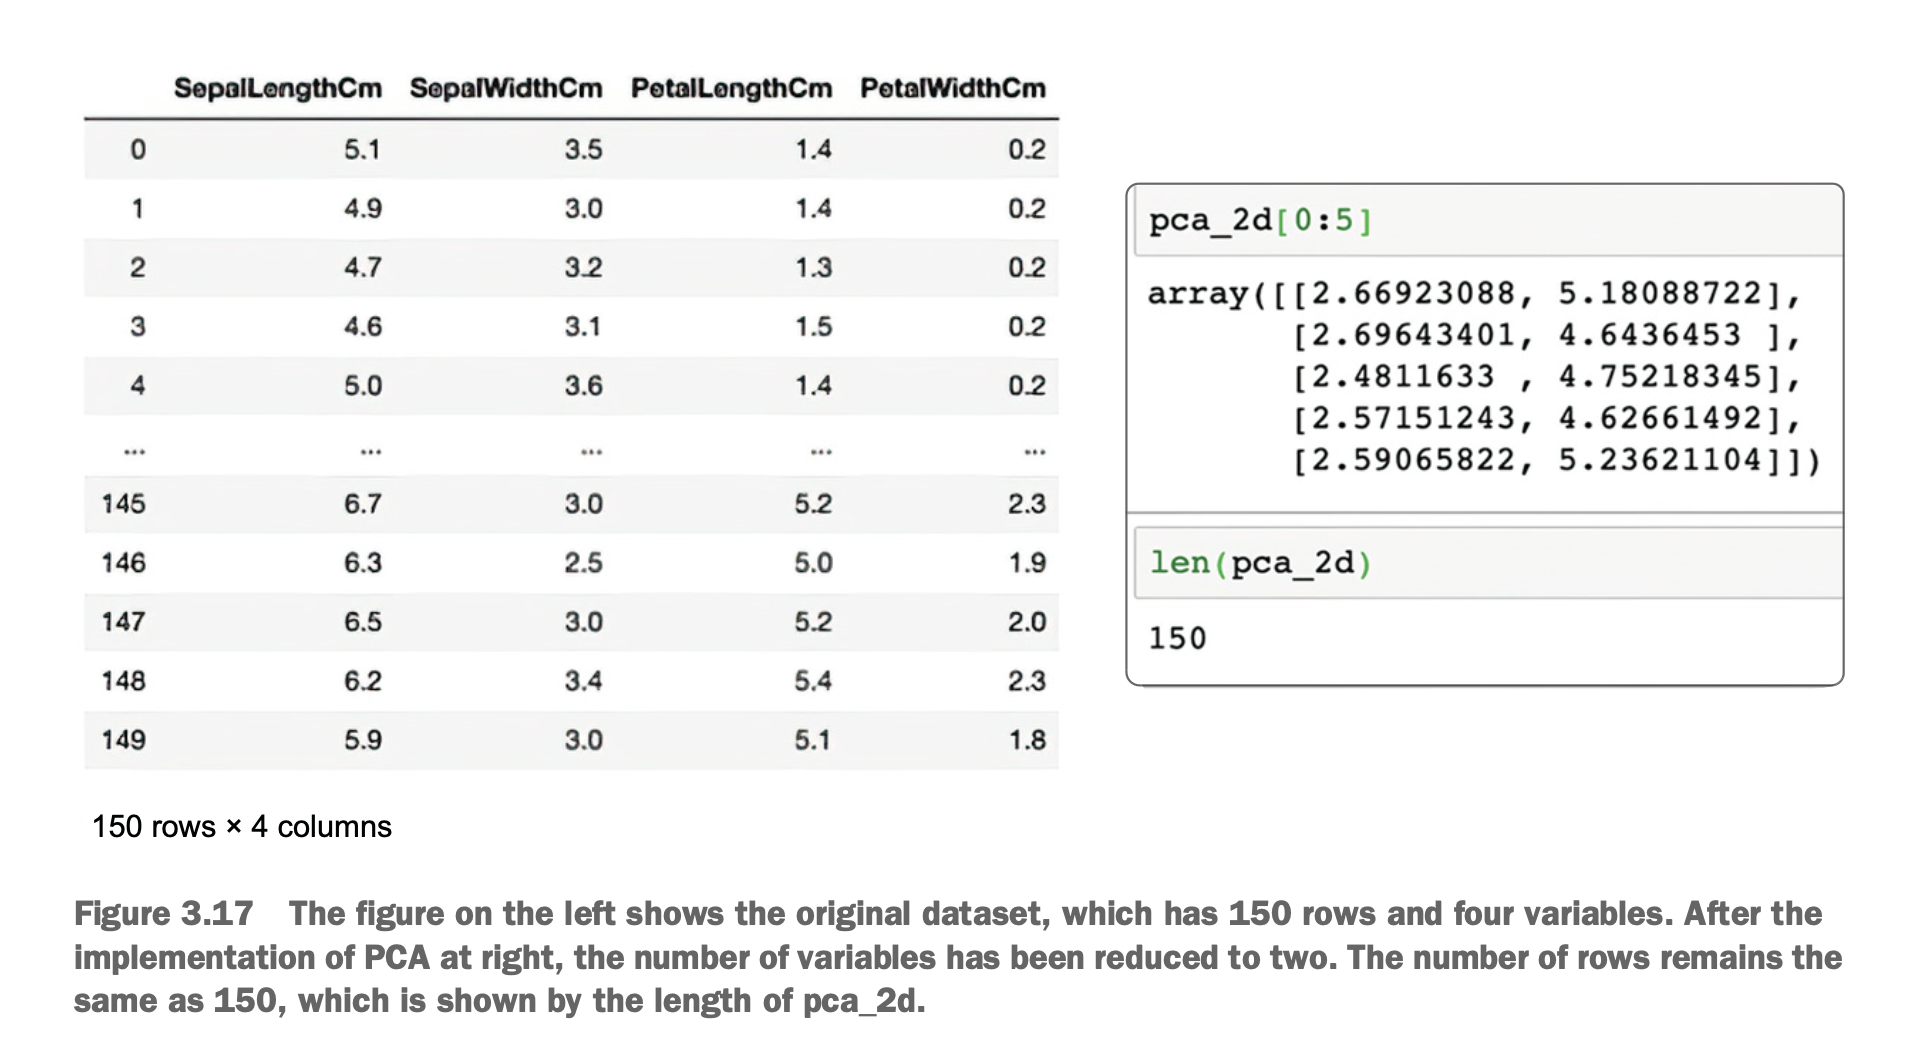

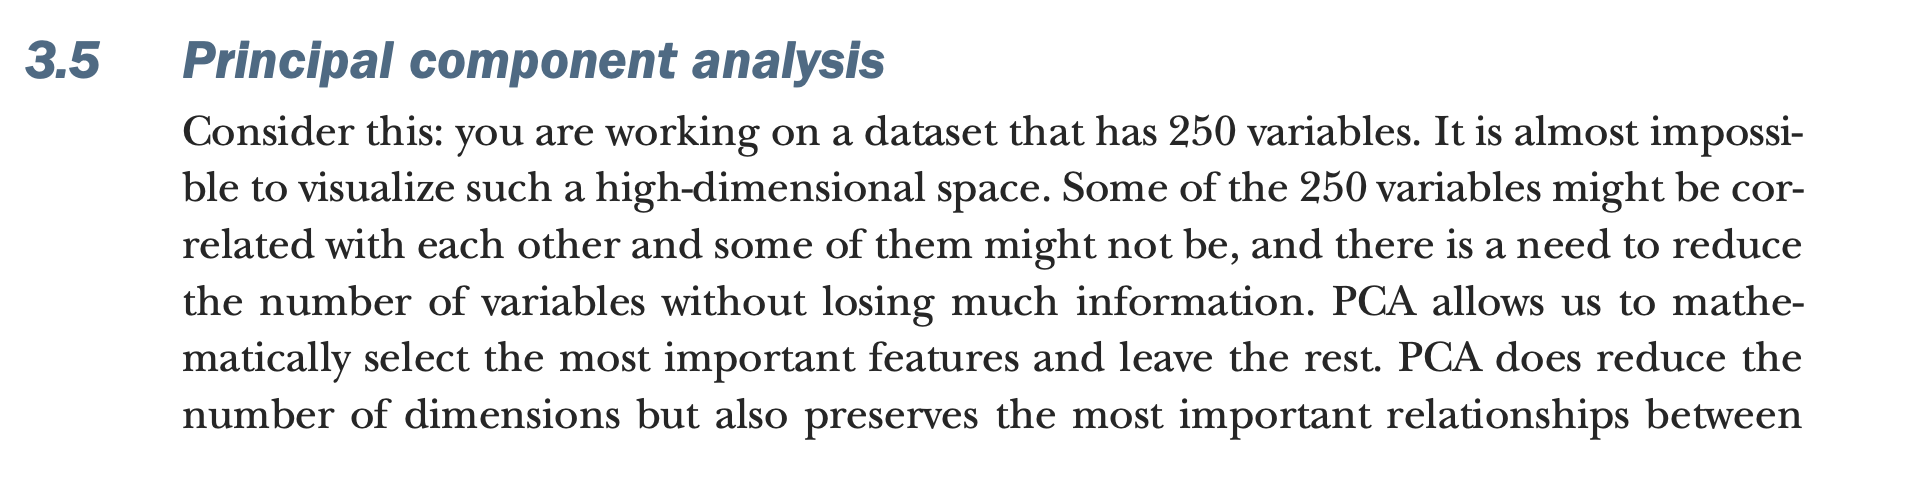
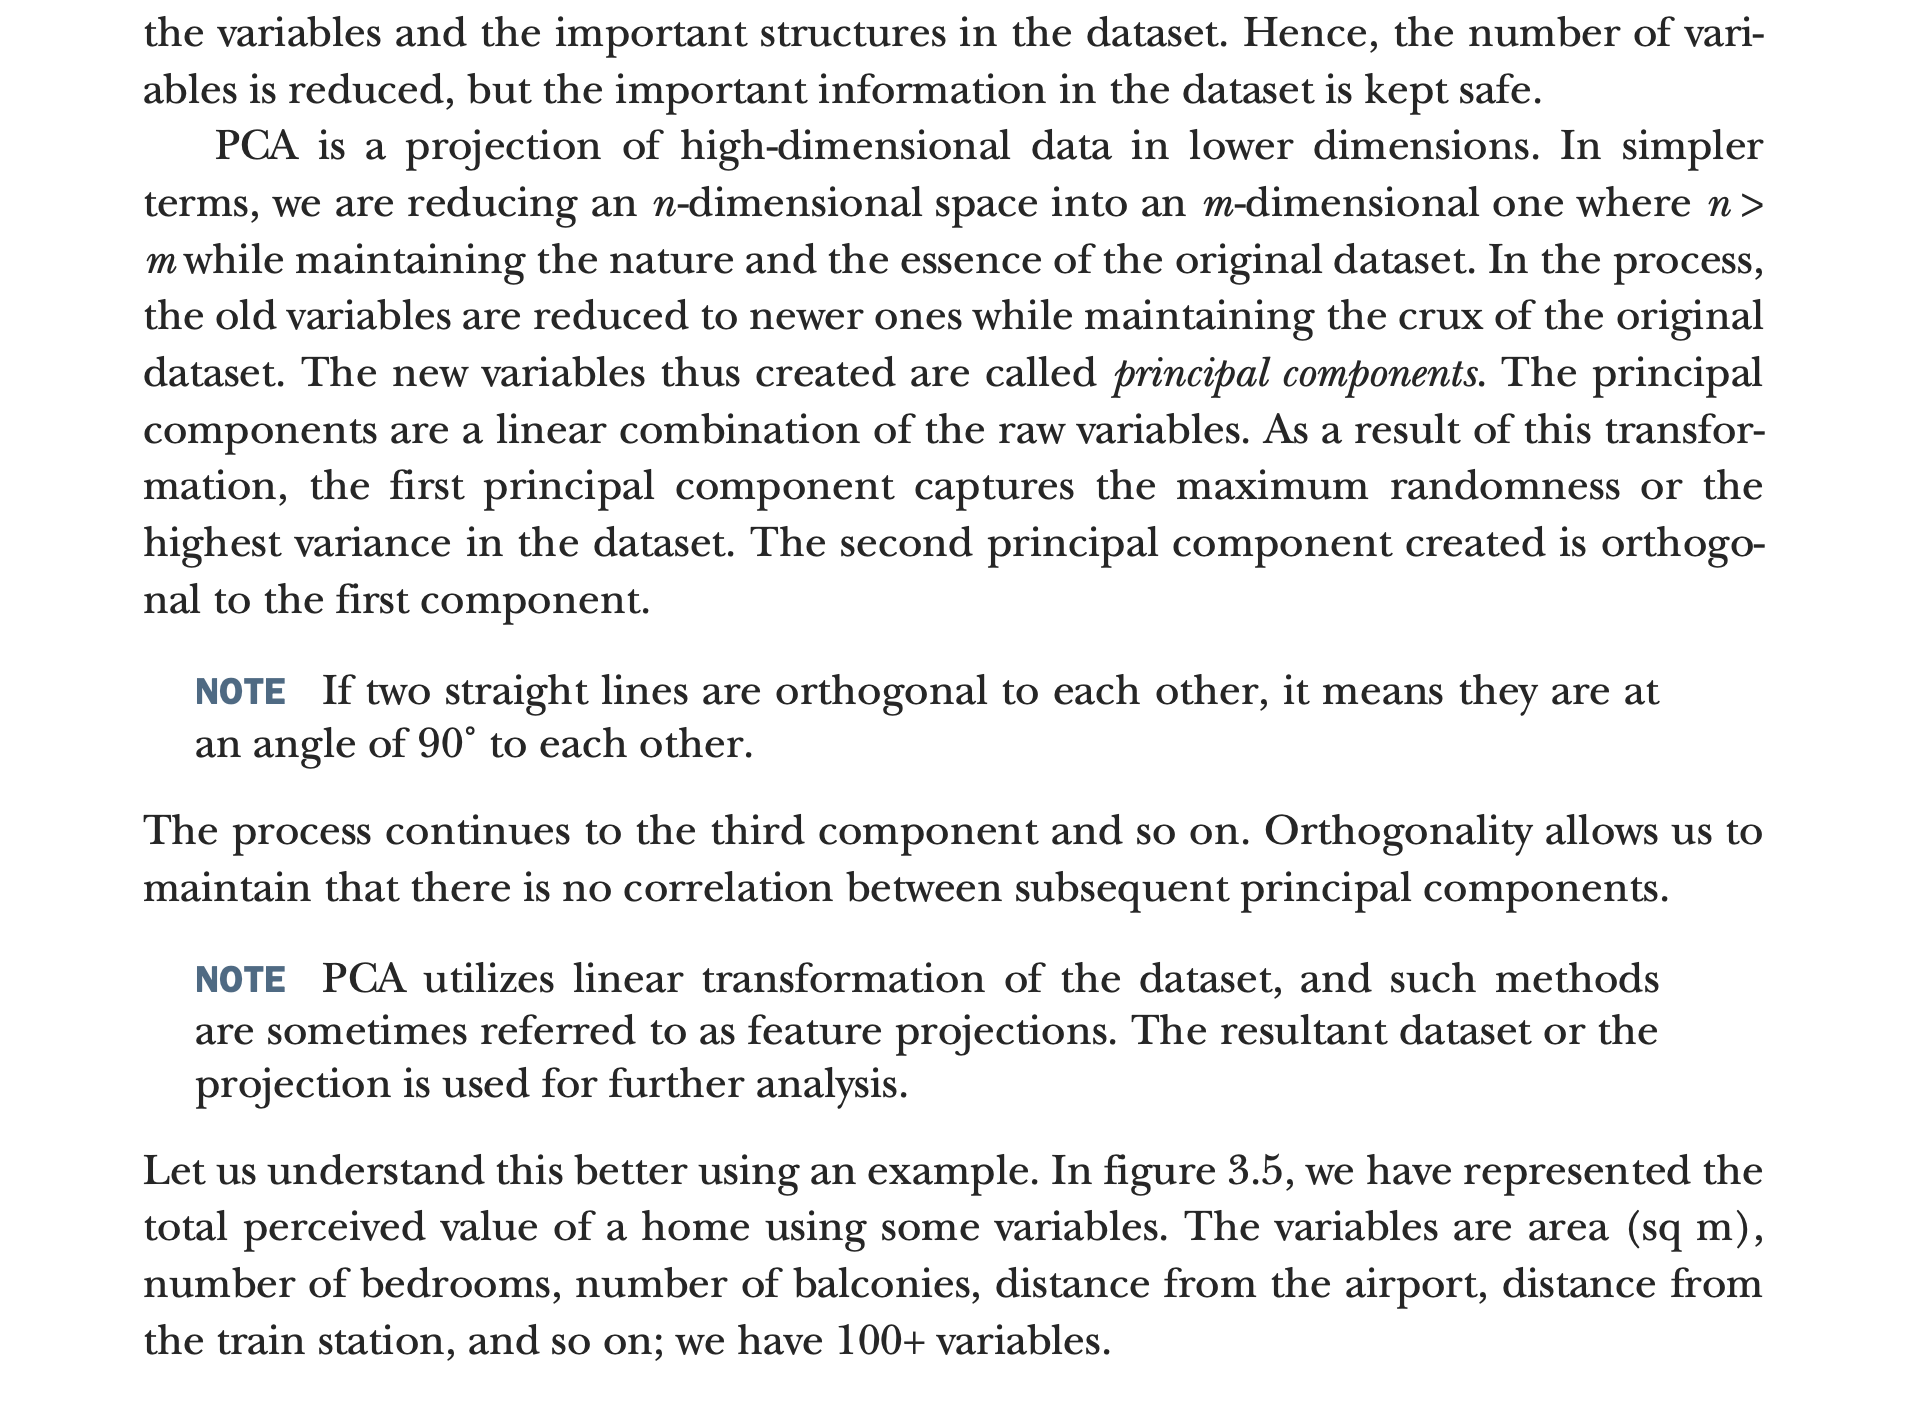
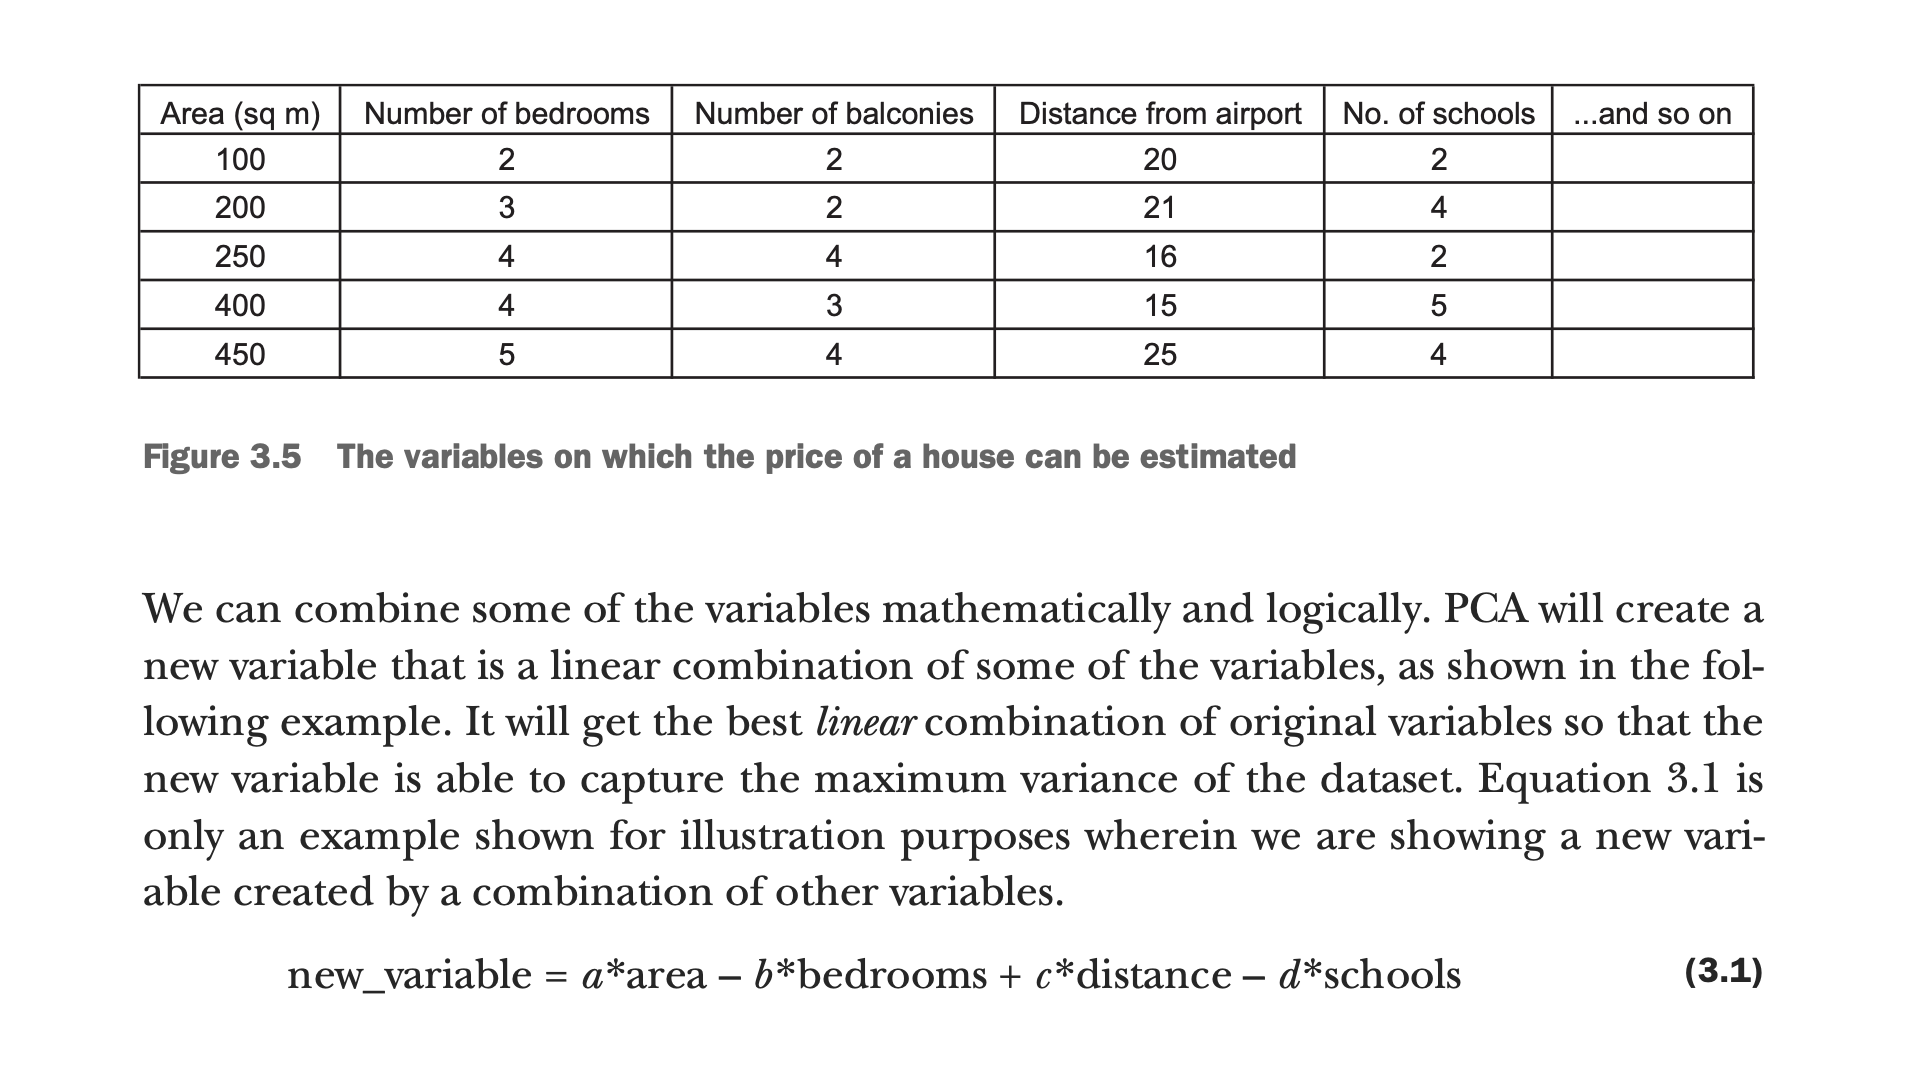
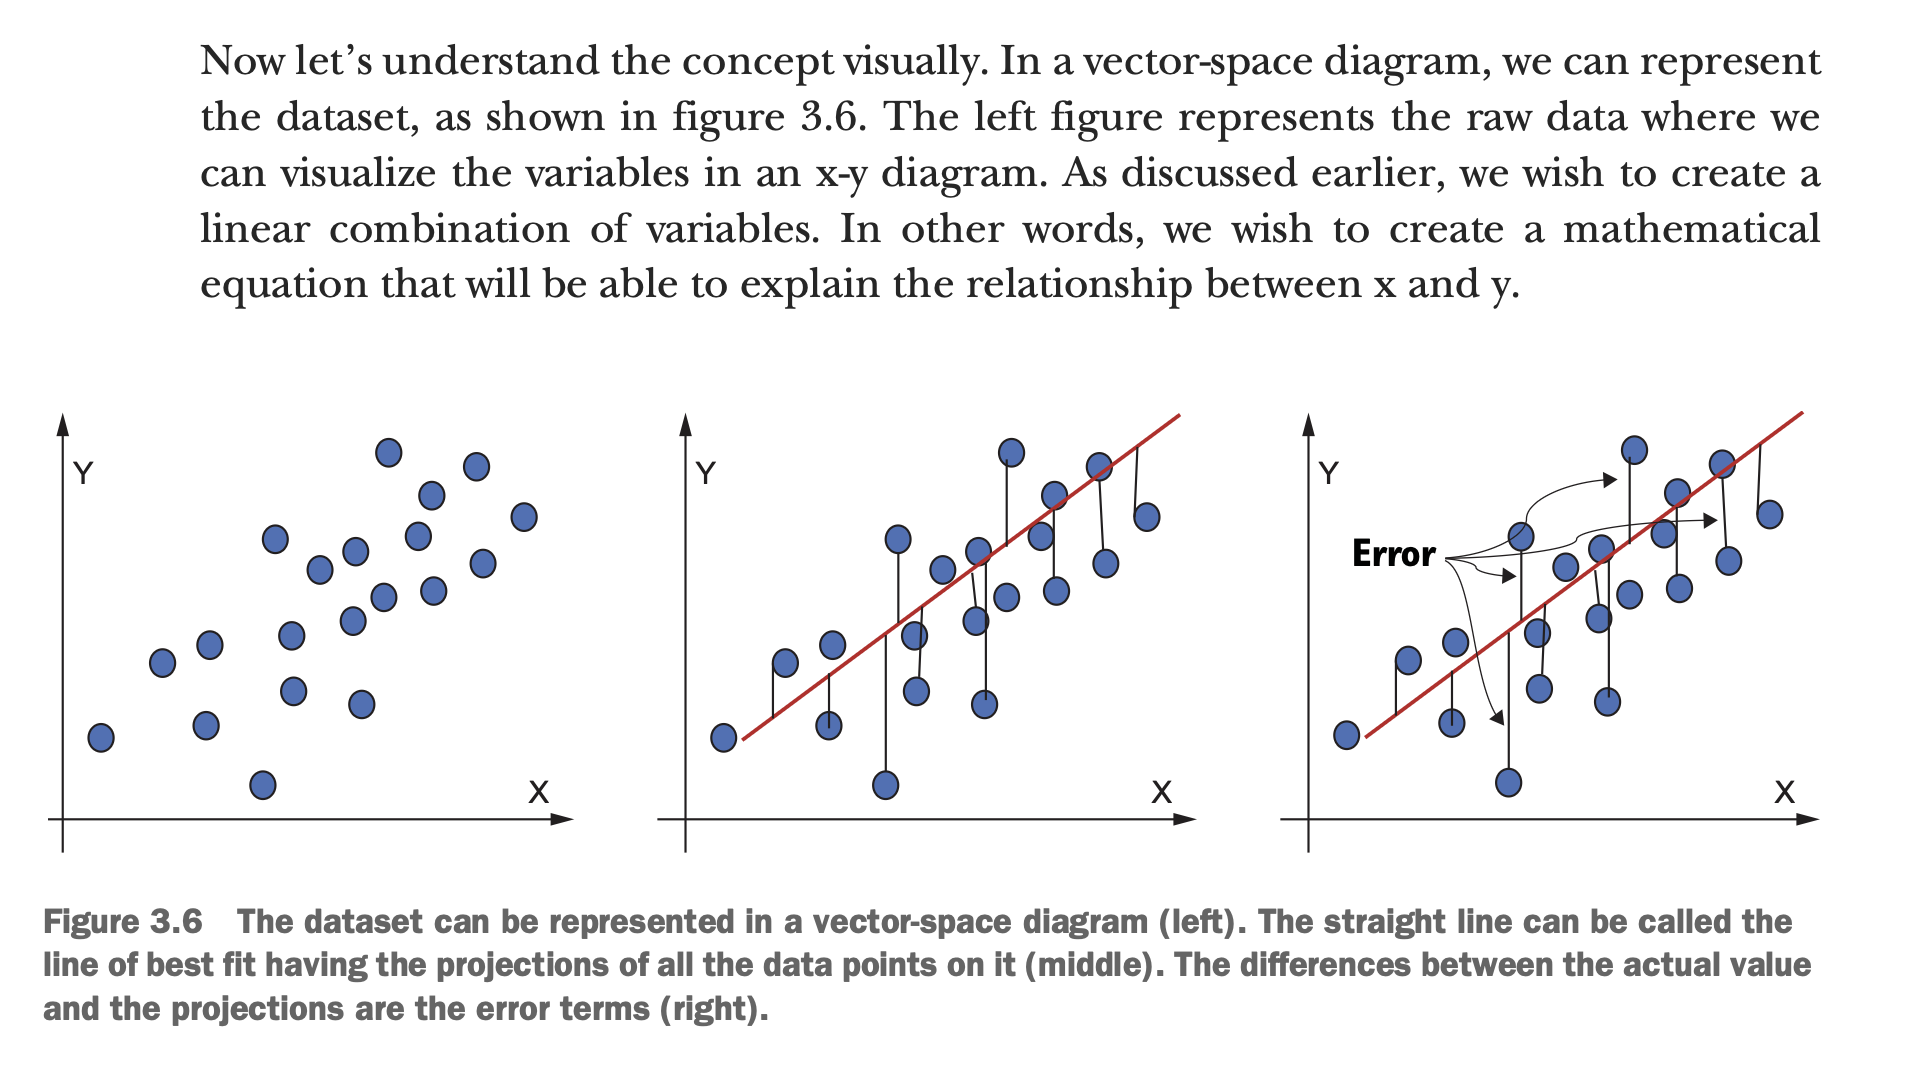
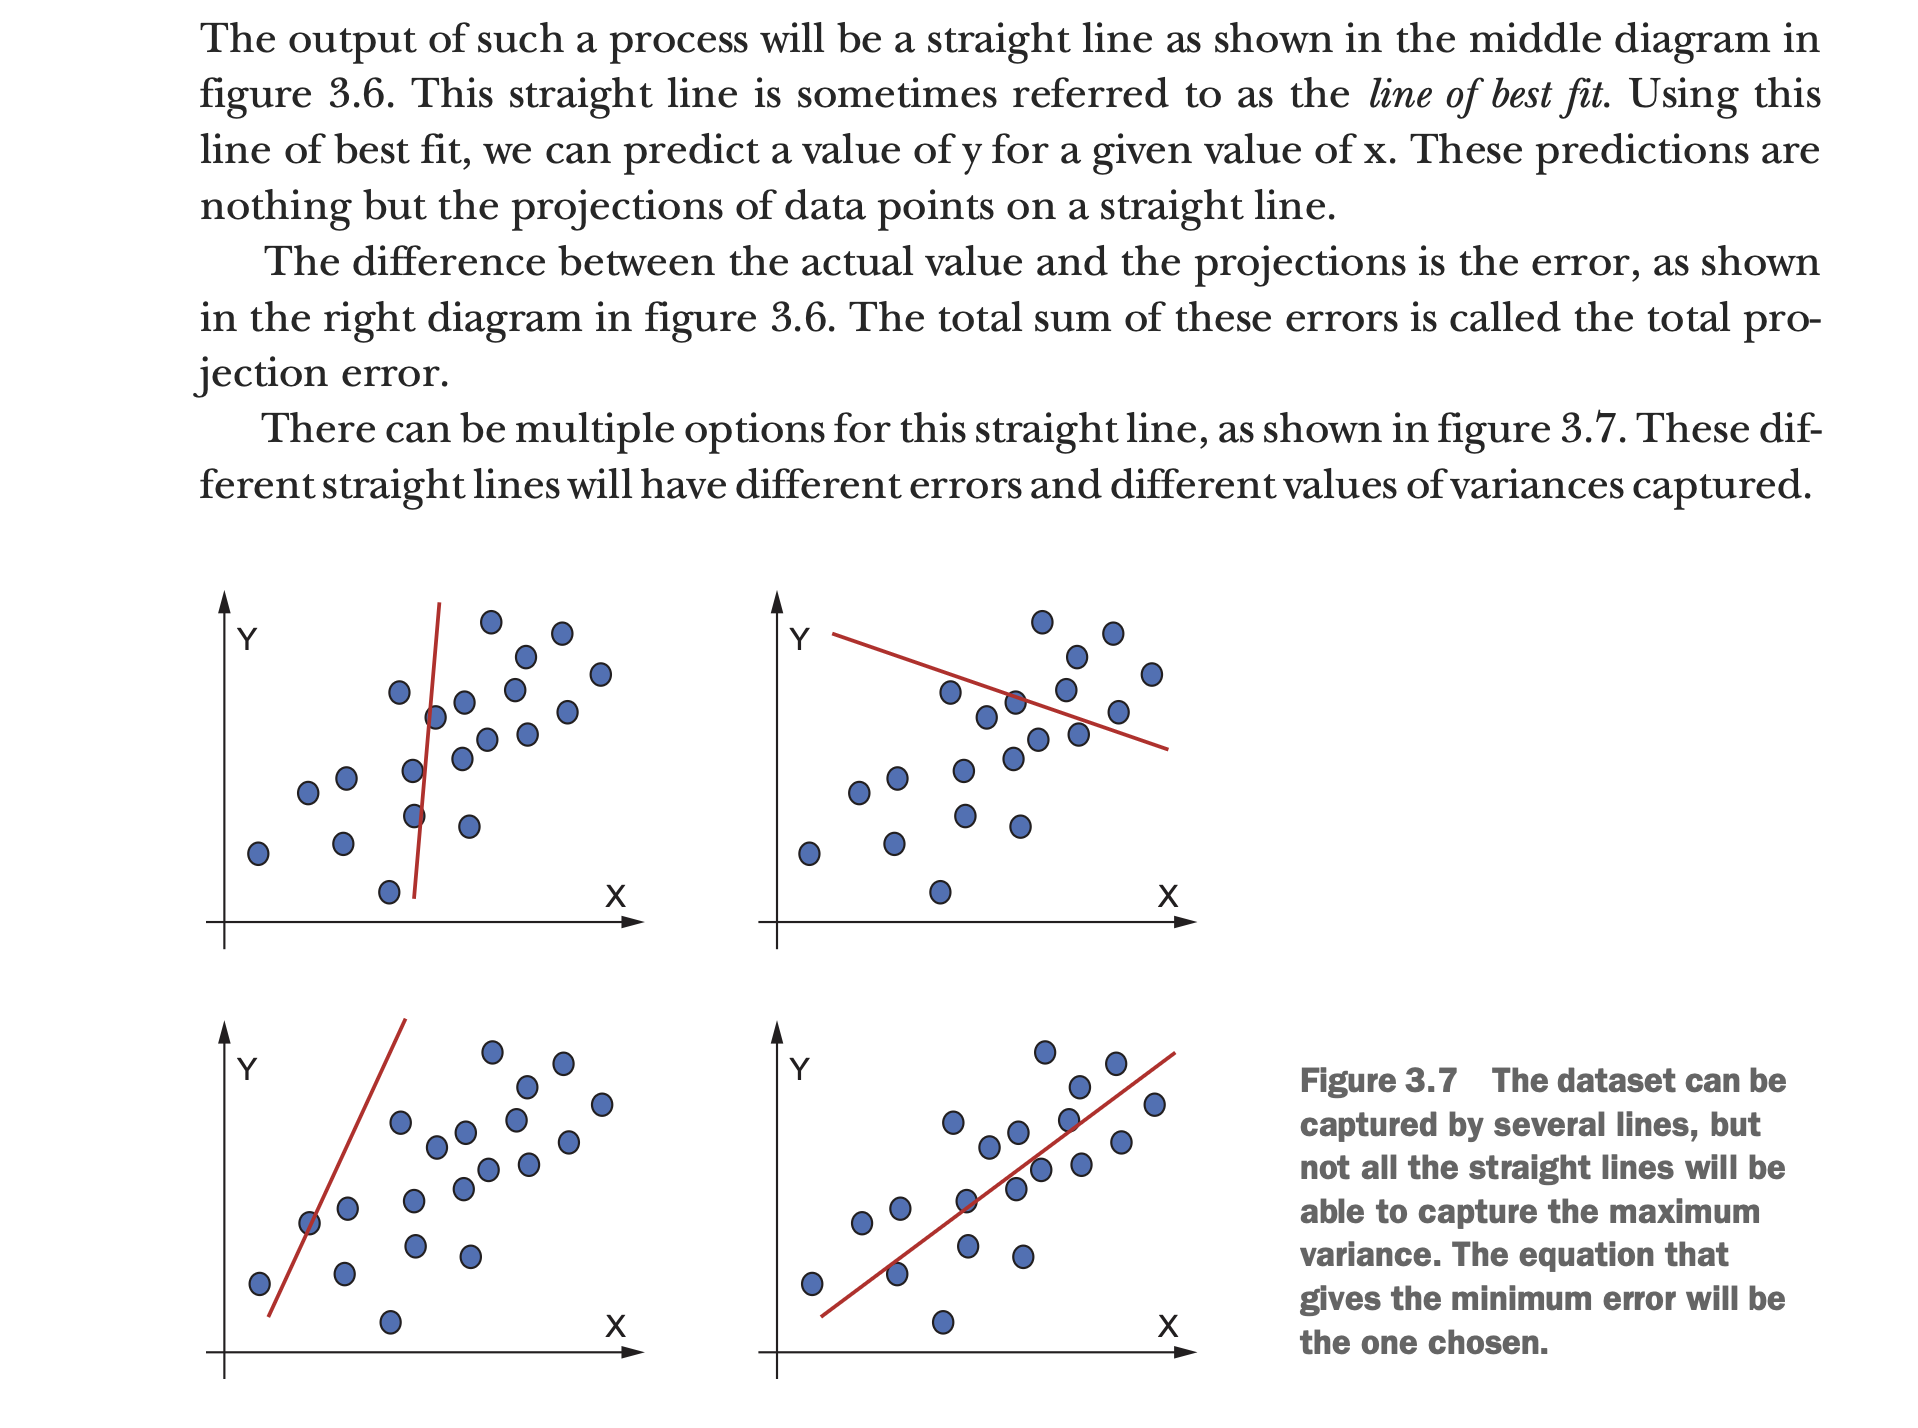
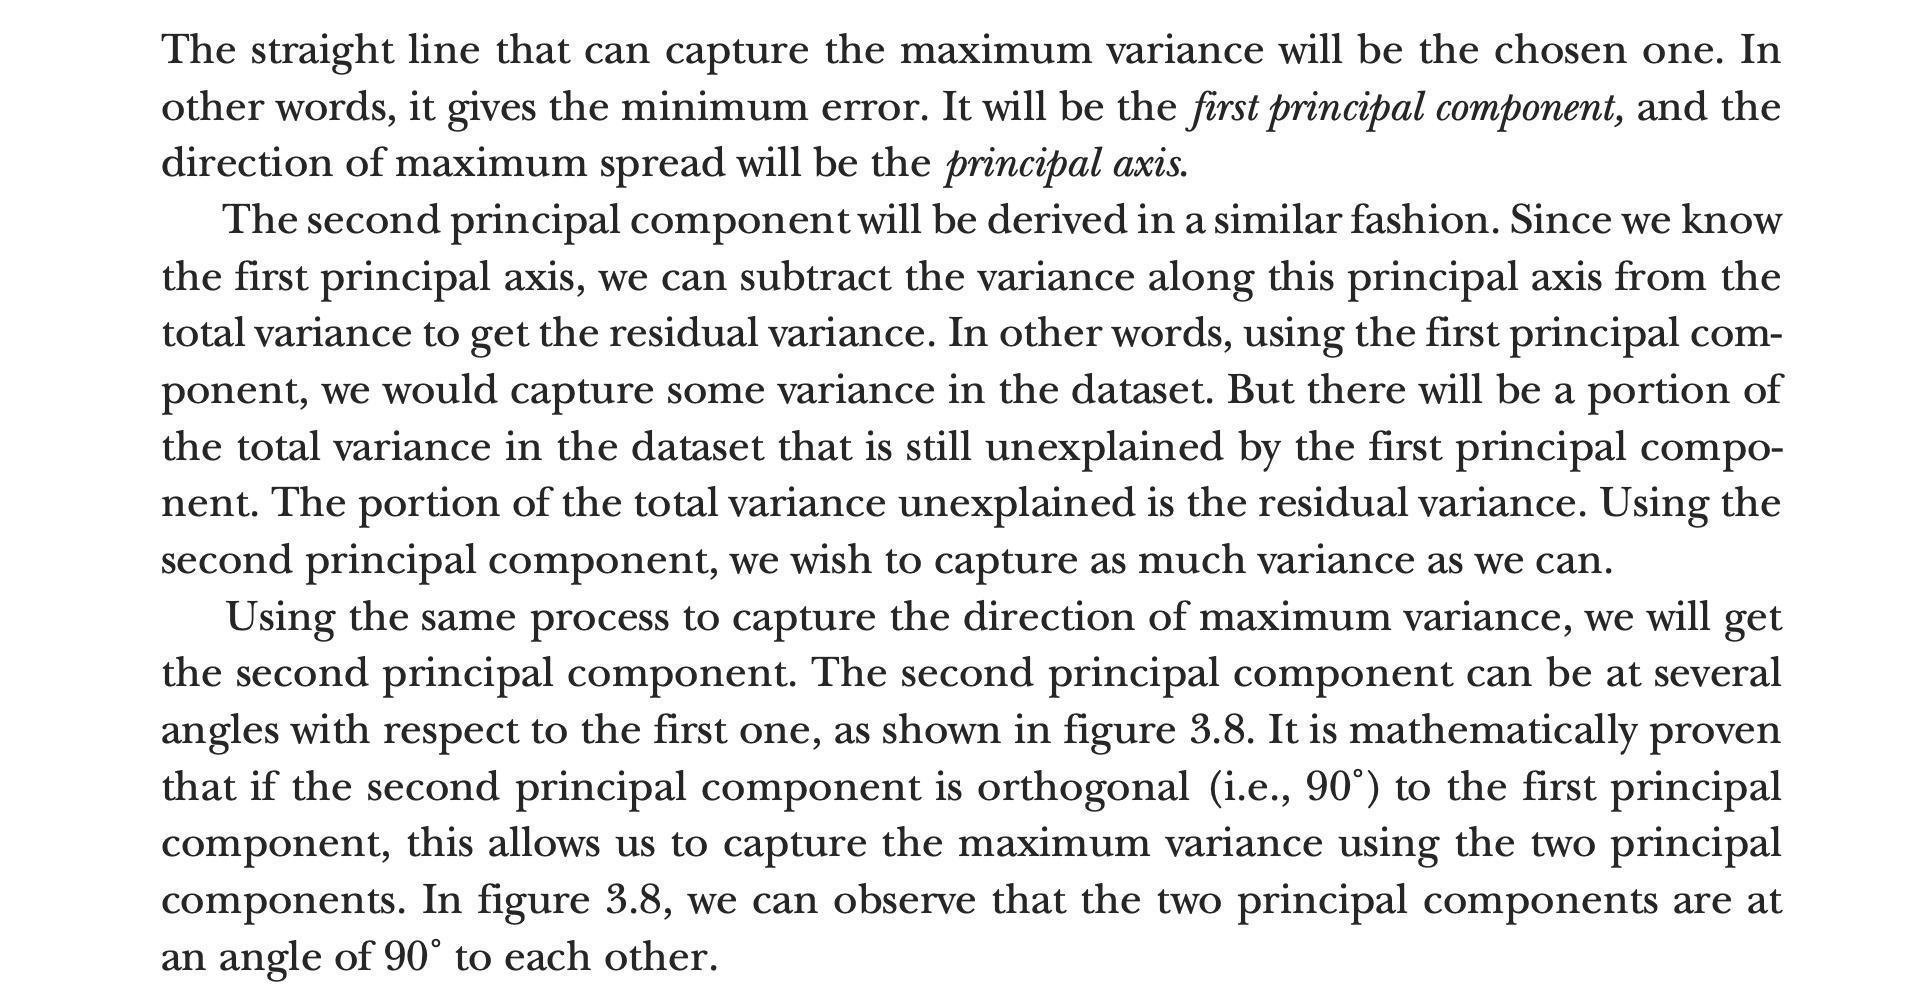
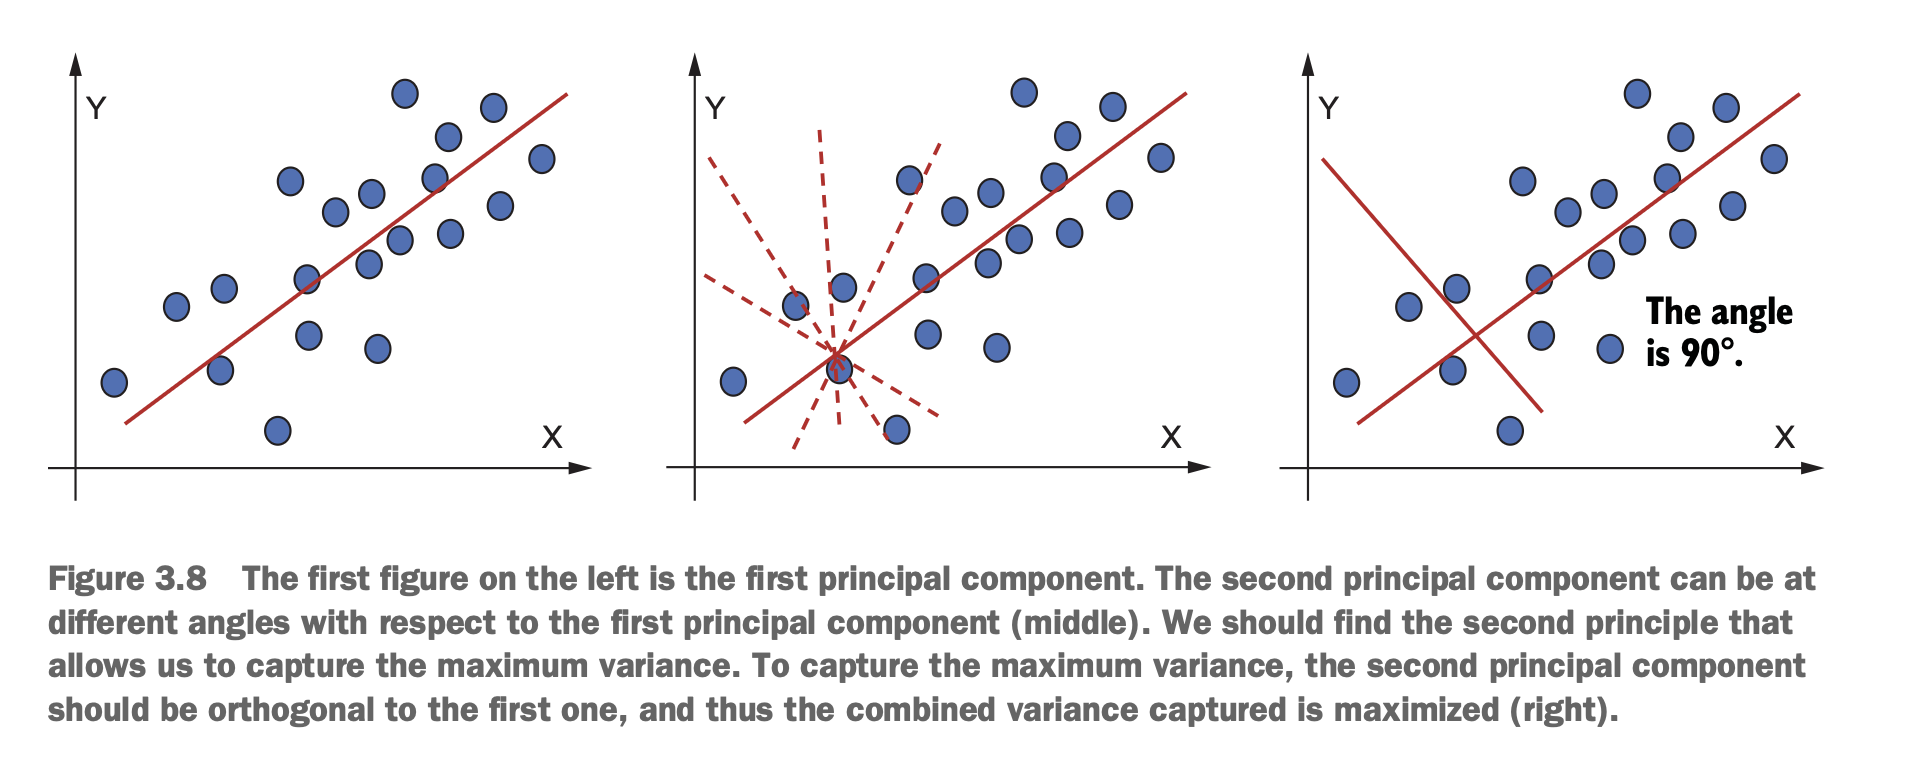
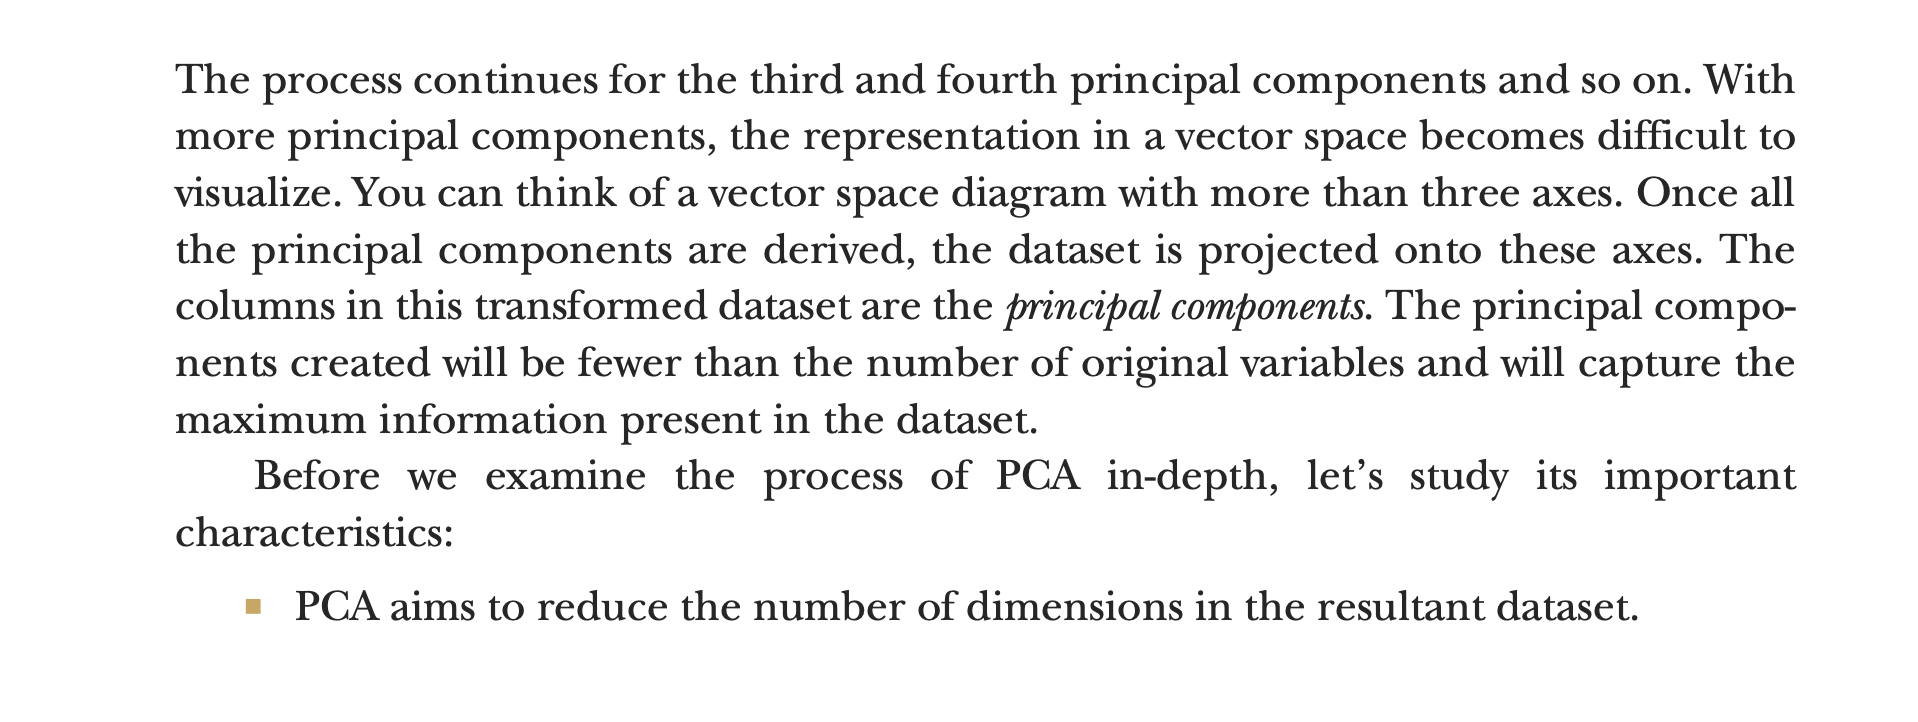
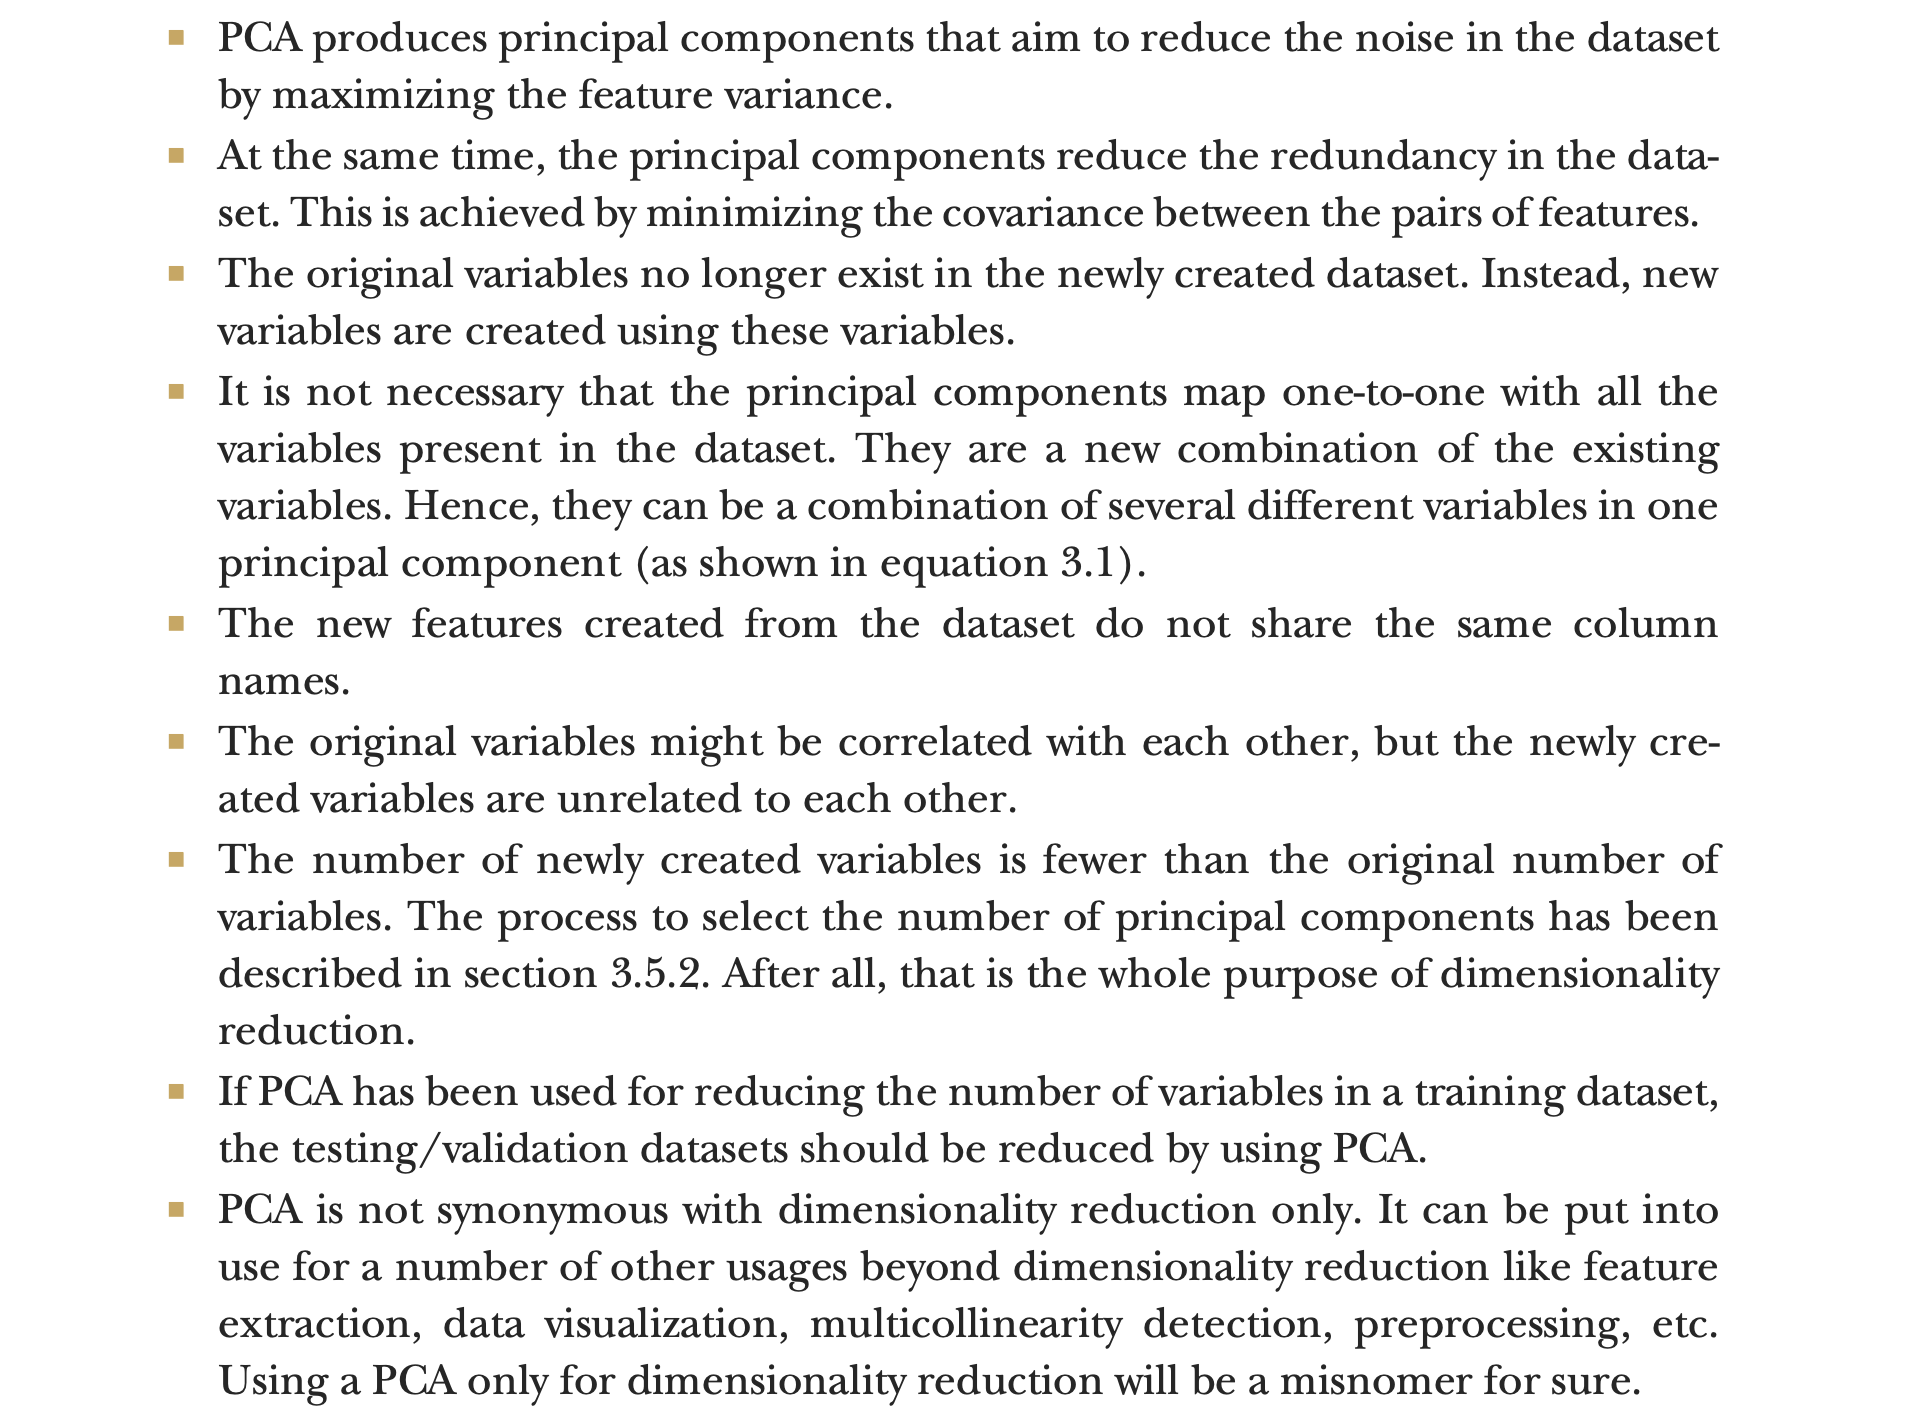
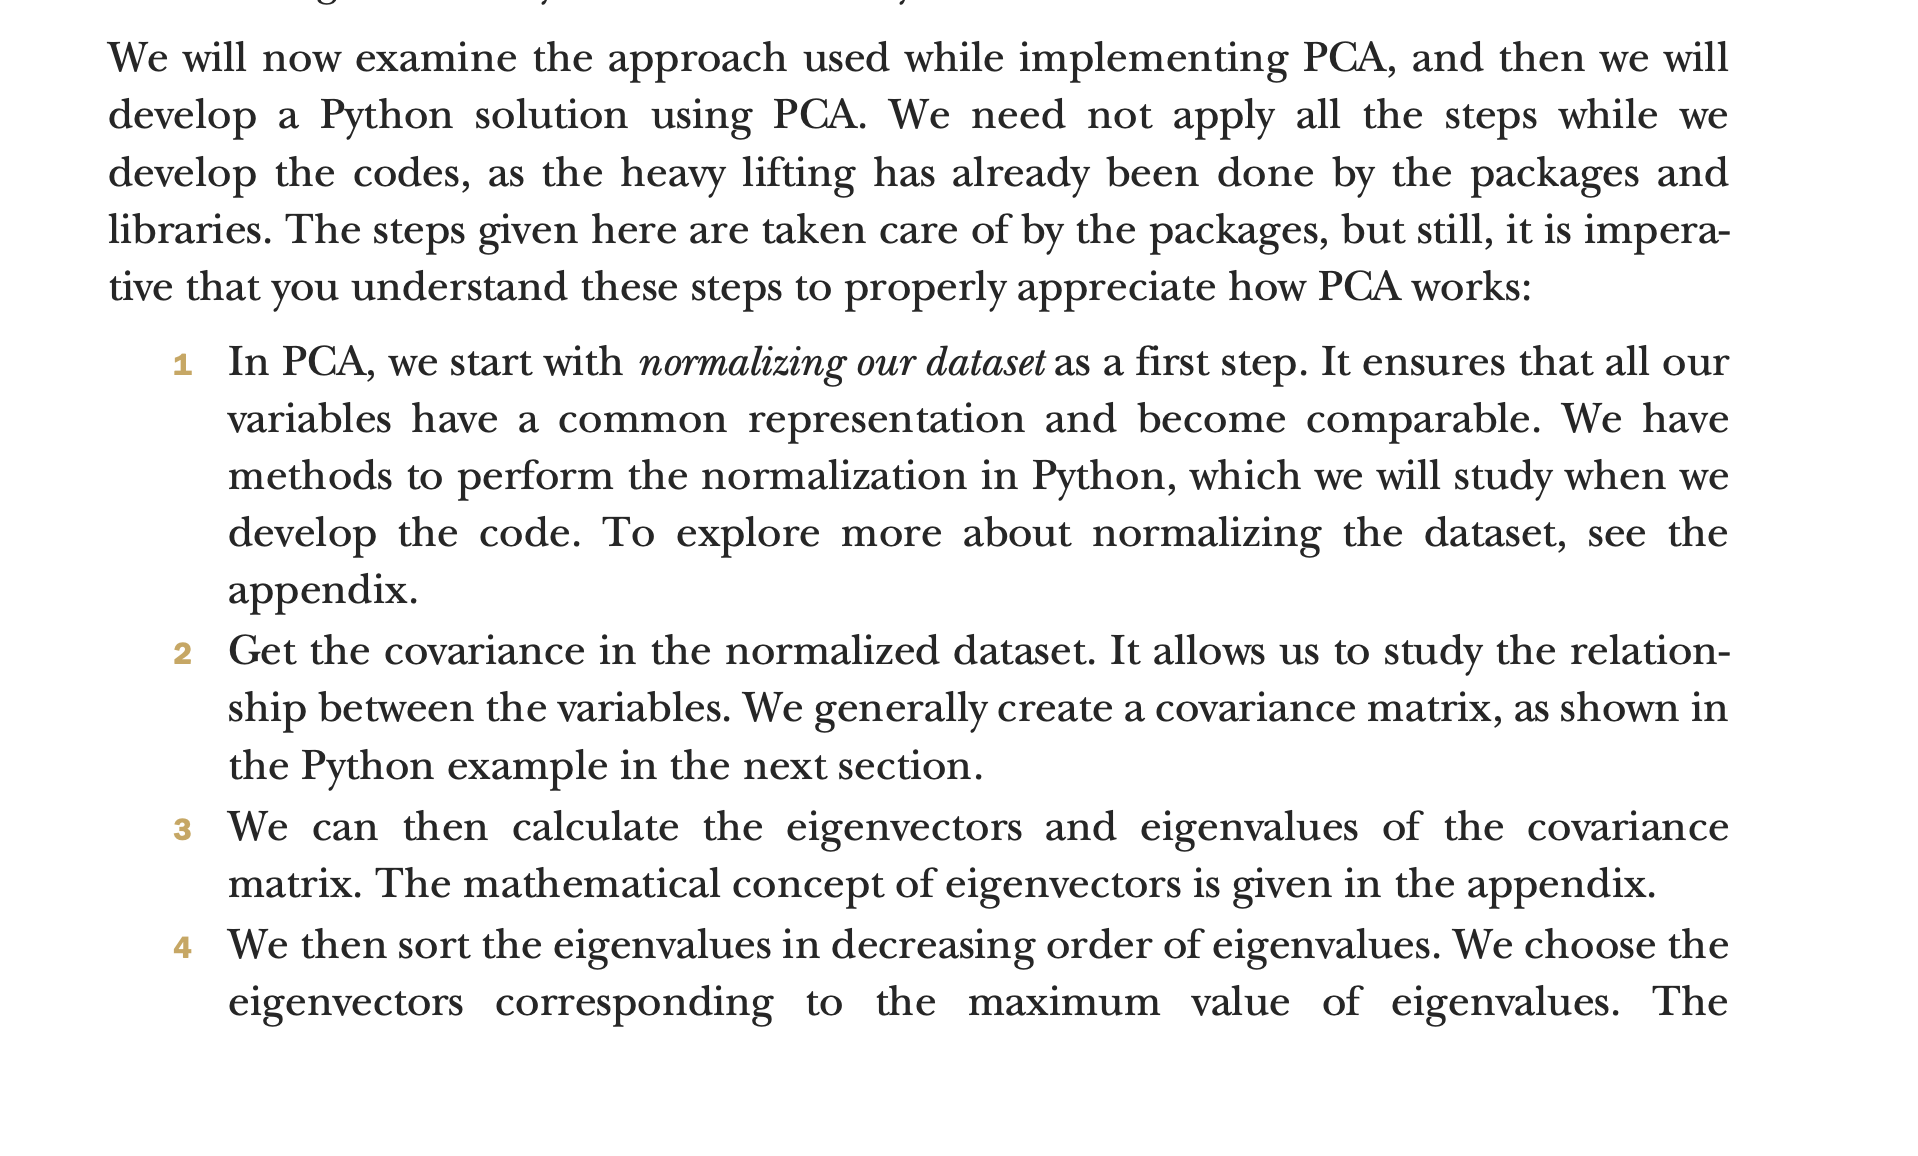
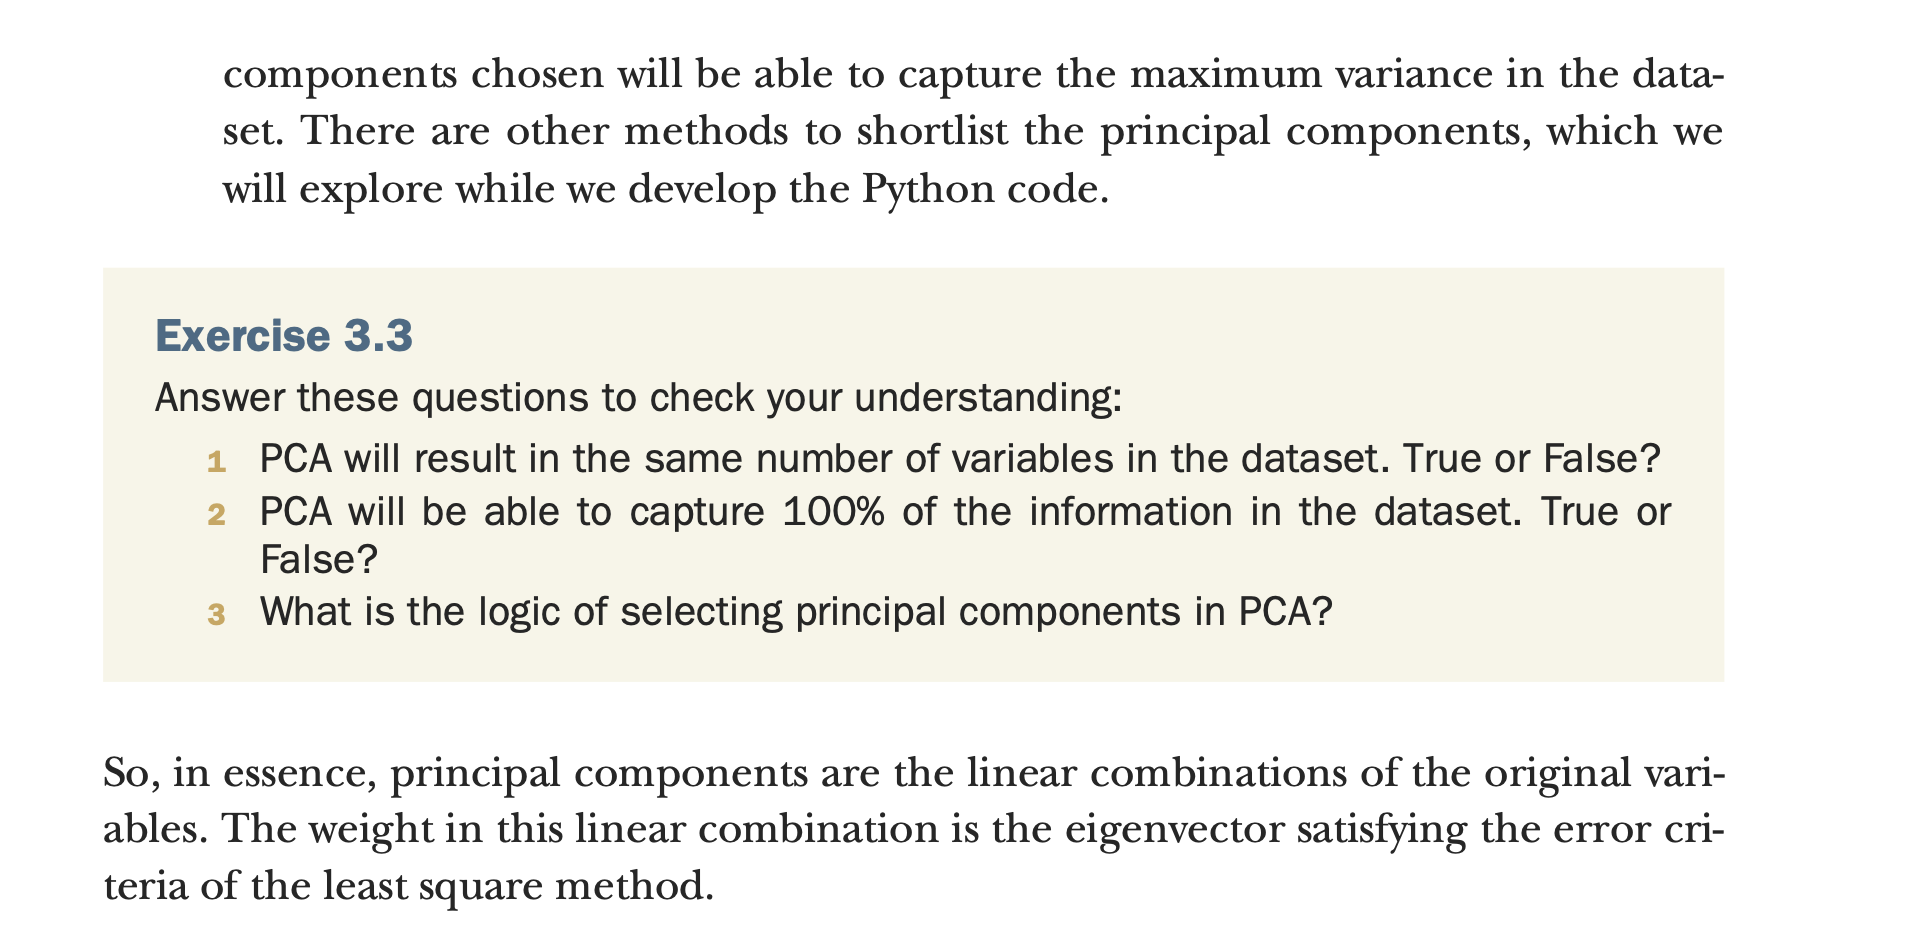